<a href="https://colab.research.google.com/github/gonzalezzayra/SIMULACION-I/blob/main/Flecha_y_cojinete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Flecha y cojinete**

Una flecha será ensamblada en un cojinete como se muestra en la imagen


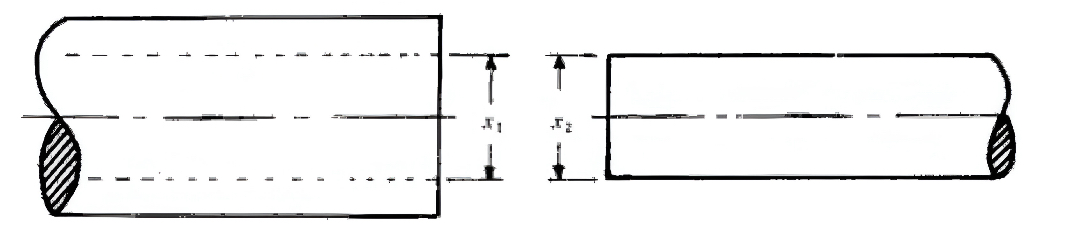

Si $x_1$ sigue una distribución normal con media de $1.5$ y varianza $0.0016$, $x_2$ sigue esta misma distribución con media $1.48$ y varianza de $0.0009$

**Con Metodología de la Simulación**

**Paso 1. (Identifique las variables)**


$$x_1 \sim N(1.5, 0.04)$$

$$x_2 \sim N(1.48, 0.03)$$

**Paso 2. (Determine la distribución de probabilidad)**


$$x_1 \sim f(x) = \frac{1}{(0.04)\sqrt{2\pi}} e^{-\frac{1}{2} \frac{(x-1.5)^2}{(0.04)^2}}$$

$$x_2 \sim f(x) = \frac{1}{(0.03)\sqrt{2\pi}} e^{-\frac{1}{2} \frac{(x-1.48)^2}{(0.03)^2}}$$



**Paso 3. (Modele las variables aleatorias)**

$$\text{Box-Müller}$$

Se eligió el $\text{Box-Müller}$ porque para este método necesitamos 2 variables aleatorias y devuelve una, aparte de que es exacto.

En comprarción con el Método de las 12 uniformes se requieren de 12 variables aleatorias y devuelve una este Método no es exacto.



**Paso 4. (Defina el modelo y los objetivos de la simulación)**

Condición de interferencia:

$$x_2 \geq x_1 $$

Buscamos:

$$P(x_2 \geq x_1)$$

**Paso 5. (Diseñe el experimento)**

Pseudocódigo:

\begin{aligned}
&\text{}  n  = 10 \\
&\text{Generar } x_1, x_2 \sim N(\mu,σ) \\
&\text{Si } x_2 \geq x_1  \\
&\text{Calcular la probabilidad de la forma }  \\
&\text{Suma de interferencias  } \text{exitos}/10
\end{aligned}


**Paso 6.**

$$\text{Repetir n veces el experimento}$$

In [93]:
#Importamos librerías
import numpy as np
import matplotlib.pyplot as plt
import random as rd

In [94]:
#Definimos el experimento
#Calcularemos la probabilidad dependiendo del valor que se le de a x
def experimento(x):
    exitos = 0 #inicializamos exitos para hacer un contador
    for i in range(x): #ciclo for
        #Generamos 2 variables aleatorias con una distribución normal
        x1 = np.random.normal(1.5, 0.04,1)  #Con una media de 1.5 y desviación de 0.04
        x2 = np.random.normal(1.48, 0.03,1) #Con una media de 1.48 y desviación de 0.03
        if x2 >= x1: #Condición de interferencia, si x2 es mayor e igual que x1
            exitos += 1 #Se suma al contador un exito
    prob = exitos / x #Calcular la probabilidad, exitos entre el numero total de casos
    return prob #Devuelve la probabilidad
print(experimento(100)) #Se imprime el valor de la probabilidad

0.35


In [95]:
n = 1500 #Valor de la muestra

lista= [] #Generamos lista
for i in range(n): #Ciclo for
    lista.append(experimento(i+1)) #llamamos a la función experimento, que fue definida anteriormente
#print(lista) #Imprime la lista con los valores generados

In [96]:
#Calcular media, desviación y varianza, será necesario para los gráficos
media = np.mean(lista)
desviacion = np.std(lista)
varianza = np.var(lista)

print("La media es: ", media)
print("La varianza es: ", varianza)
print("La desviación estándar es: ", desviacion)

La media es:  0.3454350432614645
La varianza es:  0.001540797765493422
La desviación estándar es:  0.039252996898242326


**Paso 7. (Gráfica)**


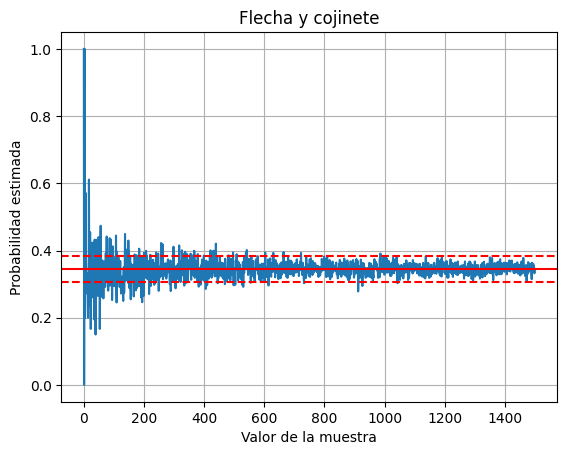

In [97]:
#Graficamos
plt.plot(lista)
plt.xlabel('Valor de la muestra')
plt.ylabel('Probabilidad estimada')
plt.title('Flecha y cojinete')
#Lineas de referencia
plt.axhline(media, color = "red") #Para la media
plt.axhline(media + desviacion, color = "red", linestyle = "dashed") #Para la media + desviacion
plt.axhline(media - desviacion, color = "red", linestyle = "dashed") #Para la media - desviacion
plt.grid(True)
plt.show()

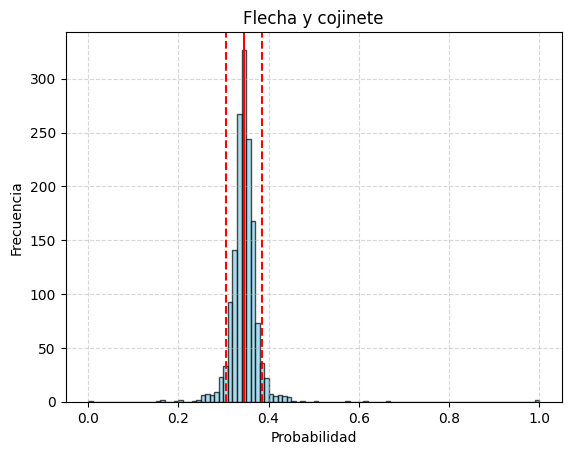

In [98]:
#Histograma
plt.hist(lista, bins=100, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Probabilidad')
plt.ylabel('Frecuencia')
plt.title('Flecha y cojinete')
#Lineas de referencia
plt.axvline(media, color = "red") #Para la media
plt.axvline(media + desviacion, color = "red", linestyle = "dashed") #Para la media + desviacion
plt.axvline(media - desviacion, color = "red", linestyle = "dashed") #Para la media - desviacion
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

**Paso 8. (Determinar el valor de la Probabilidad de Interferencia)**


**Analíticamente:**

Con diferencia de Distribuciones (ya que tenemos dos distribuciones normales)

Tenemos:

$$\mu_1 = 1.5, \text{ } \sigma_1 = 0.04$$

$$\mu_2 = 1.48, \text{ } \sigma_2 = 0.03$$

Definimos $D$ como la diferencia

$$D = x_2 - x_1 $$

$$ \mu = \mu_2 - \mu_1 = 1.48 - 1.5 = -0.02$$

$$\sigma^2 = \sigma_1^2 + \sigma_2^2 = 0.0025$$

$$\sigma = 0.05$$



$$X \sim N(\mu_1 - \mu_2, \sqrt{\sigma_1^2 + \sigma_2^2})$$


$$P(x_2 -x_1 \geq 0) = \int_{0}^{x_2 - x_1} N(-0.02,0.05) dx \text{ } \text{ Abuso de notación}$$



$$\int_{0}^{x_2 - x_1} N(-0.02,0.05) dx \text{ } =\frac{1}{(0.05)\sqrt{2\pi}} e^{-\frac{1}{2} \cdot \frac{(t-(-0.02))^2}{(0.05)^2}}$$

Tenemos $z \sim N(-0.02, 0.05)$, queremos obtener

$$P(x_2 \geq x_1 ) = P(z \geq 0)$$

estandarizamos

$$z = \frac{x - \mu}{\sigma} = \frac{0+0.02}{0.05} = 0.4$$

Calculamos, con ayuda de las tablas  

$$P(z\geq 0.4) = 1 - 0.65542 = 0.34458$$


Si lo queremos obtener con Python, lo podemos hacer de la siguiente forma:

In [100]:
#Con Python calculamos la probabilidad de interferencia
import scipy.stats as st

probabilidad = 1 - st.norm.cdf(0,-0.02,0.05)
print("P(x2 - x1 >= 0)= ",probabilidad)

P(x2 - x1 >= 0)=  0.3445782583896758


**Paso 9.**


El # de veces que es necesario hacer el experimento si se quiere que la probabilidad de interferencia estimada difiera de su valor verdadero de 0.01, con un nivel de seguridad del 95%


**Analíticamente:**

Para el tamaño de la muestra, lo ocuparemos para una Población Infinita.

$$\text{Nivel de confianza: 95%}$$

$$\text{Nivel de error: 0.01}$$

La fórmula para una Población Infinita es:

$$n = \frac{z_{\alpha}^2 \cdot p \cdot (1-p)}{e^2} = \frac{(1.96)^2 (0.3446)(0.6554)}{(0.01)^2}$$

$$n = 8676.2878$$




In [101]:
#Con ayuda de la librerias de Python
import statistics
import math

#Calcular la media muestral y desviaciónn muestral de la lista
media_muestral = statistics.mean(lista)
desviacion_muestral = statistics.stdev(lista)

print("Media muestral:", media_muestral)
print("Desviación estándar muestral:", desviacion_muestral)

#Calcular el intervalo de confianza

x_1 = media_muestral - 1.96 * (desviacion_muestral / math.sqrt(n))
x_2 = media_muestral + 1.96 * (desviacion_muestral / math.sqrt(n))

print("Intervalo de confianza 95%:", [x_1, x_2])

Media muestral: 0.3454350432614645
Desviación estándar muestral: 0.039266087776344556
Intervalo de confianza 95%: [0.34344790504882544, 0.3474221814741036]


In [102]:
#Tamaño de la muestra
z = 1.96
e = 0.01

print("El tamaño de la muestra:", n)

tam = (((z)**2)*media_muestral*(1-media_muestral))/((e)**2)

print("El tamaño de la muestra calculado:", tam)

El tamaño de la muestra: 1500
El tamaño de la muestra calculado: 8686.229242085497
